# Datová analýza v Pythonu

Data jsou vytvořena z [Pokedexu na Githubu](https://github.com/veekun/pokedex).

![pokemons](http://cdn-static.denofgeek.com/sites/denofgeek/files/pokemon_4.jpg)

## Speciální příkaz pro notebook

aby nám zobrazoval obrázkové výsledky přímo pod buňkou s příkazem.

In [ ]:
%matplotlib inline

## Import knihoven

In [ ]:
import pandas as pd
import os

## Import dat

In [ ]:
cesta_k_souboru = os.path.join('data', 'Pokemon.csv')

In [ ]:
data = pd.read_csv(cesta_k_souboru)

In [ ]:
data.head()

## Nápověda kdykoli k dispozici

In [ ]:
pd.read_csv?

In [ ]:
data.head?

## Sloupce a řádky

### Sloupce

In [7]:
data['name'].head()

0     bulbasaur
1       ivysaur
2      venusaur
3    charmander
4    charmeleon
Name: name, dtype: object

In [8]:
data[['name', 'total']].head()

,name,total
0,bulbasaur,318
1,ivysaur,405
2,venusaur,525
3,charmander,309
4,charmeleon,405


### Řádky

In [9]:
data.loc[1]

id                                2
name                        ivysaur
height                            1
weight                           13
color                         green
shape                     quadruped
is baby                       False
type 1                        Grass
type 2                       Poison
hp                               60
attack                           62
defense                          63
sp. attack                       80
sp. defense                      80
speed                            60
total                           405
generation                        1
evolves from                      1
evolution group                   1
fm gender ratio                 1:7
has_gender_differences            0
Name: 1, dtype: object

In [10]:
data.loc[[1, 2, 3]]

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
1,2,ivysaur,1.0,13.0,green,quadruped,False,Grass,Poison,60,...,63,80,80,60,405,1,1.0,1,1:7,0
2,3,venusaur,2.0,100.0,green,quadruped,False,Grass,Poison,80,...,83,100,100,80,525,1,2.0,1,1:7,1
3,4,charmander,0.6,8.5,red,upright,False,Fire,NaN,39,...,43,60,50,65,309,1,NaN,2,1:7,0


In [11]:
data.loc[:5]

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
0,1,bulbasaur,0.7,6.9,green,quadruped,False,Grass,Poison,45,...,49,65,65,45,318,1,NaN,1,1:7,0
1,2,ivysaur,1.0,13.0,green,quadruped,False,Grass,Poison,60,...,63,80,80,60,405,1,1.0,1,1:7,0
2,3,venusaur,2.0,100.0,green,quadruped,False,Grass,Poison,80,...,83,100,100,80,525,1,2.0,1,1:7,1
3,4,charmander,0.6,8.5,red,upright,False,Fire,NaN,39,...,43,60,50,65,309,1,NaN,2,1:7,0
4,5,charmeleon,1.1,19.0,red,upright,False,Fire,NaN,58,...,58,80,65,80,405,1,4.0,2,1:7,0
5,6,charizard,1.7,90.5,red,upright,False,Fire,Flying,78,...,78,109,85,100,534,1,5.0,2,1:7,0


### Konkrétní hodnoty

In [ ]:
data['name'][100]

In [ ]:
data.loc[100, 'name']

## Filtrace dat

In [ ]:
data[data['hp'] > 100].head()

In [ ]:
data[(data['attack'] > 100) & (data['color'] == "red")].head()

In [ ]:
data[(data["type 1"] == "Poison") | (data['type 2'] == 'Poison')].head()

## Celkový pohled na data

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data.describe()

## Nulové hodnoty

In [ ]:
data.isnull().sum()

## Kolerační koeficienty mezi jednotlivými sloupci

In [ ]:
data.corr()

In [ ]:
corr = data.corr()

In [ ]:
corr[corr > 0.7]

## Souhrné histogramy ke každému sloupci

Sloupec *is_baby* nejdříve převedeme z `bool` na `int`.

In [ ]:
data["is baby"] = data["is baby"].astype(int)

In [ ]:
data.hist(figsize=(30, 30), xlabelsize=20, ylabelsize=20);

## Čištění datasetu

In [ ]:
data.head()

### Pryč s nepotřebným sloupcem

In [ ]:
data = data.drop(columns=["has_gender_differences"])
# data.drop(columns=["has_gender_differences"], inplace=True)

### Oprava špatného jména sloupce *is_baby*

In [ ]:
data.rename(columns={"is_baby": "is baby"}, inplace=True)

### Oprava datového typu sloupce *evolves from*

In [ ]:
data["evolves from"] = data["evolves from"].fillna(0).astype(int)

## Řazení

### Top 5 nejlepších pokémonů

In [ ]:
top5 = data.sort_values(by='total', ascending=False)[:5]
top5

![best pokemon](https://img.pokemondb.net/artwork/large/arceus.jpg)

### Top 5 nejvyšších pokémonů

In [ ]:
data.sort_values(by="height", ascending=False).head()

![wailord](https://img.pokemondb.net/artwork/large/wailord.jpg)

### Top 5 nejtěžších pokémonů

In [ ]:
data.sort_values(by="weight", ascending=False).head()

![celesteela](https://img.pokemondb.net/artwork/large/celesteela.jpg)

## První úkol (filtrace dat) - dětská obezita

### Který dětský Pokémon je nejtěžší?

In [13]:
children = data[data["is baby"] == True]
by_weight = children.sort_values(by="weight", ascending=False)
by_weight

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
445,446,munchlax,0.6,105.0,black,humanoid,True,Normal,NaN,135,...,40,40,85,5,390,4,NaN,72,1:7,0
457,458,mantyke,1.0,65.0,blue,wings,True,Water,Flying,45,...,50,60,120,50,345,4,NaN,116,1:1,0
439,440,happiny,0.6,24.4,pink,humanoid,True,Normal,NaN,100,...,5,15,65,30,220,4,NaN,51,1:0,0
238,239,elekid,0.6,23.5,yellow,humanoid,True,Electric,NaN,45,...,37,65,55,95,360,2,NaN,60,1:3,0
239,240,magby,0.7,21.4,red,upright,True,Fire,NaN,45,...,37,70,55,83,365,2,NaN,61,1:3,0
235,236,tyrogue,0.7,21.0,purple,humanoid,True,Fighting,NaN,35,...,35,35,35,35,210,2,NaN,47,0:1,0
446,447,riolu,0.7,20.2,blue,upright,True,Fighting,NaN,40,...,40,35,40,60,285,4,NaN,232,1:7,0
437,438,bonsly,0.5,15.0,brown,legs,True,Rock,NaN,50,...,95,10,45,10,290,4,NaN,91,1:1,0
359,360,wynaut,0.6,14.0,blue,upright,True,Psychic,NaN,95,...,48,23,48,23,260,3,NaN,100,1:1,0
438,439,mime-jr,0.6,13.0,pink,humanoid,True,Psychic,Fairy,20,...,45,70,90,60,310,4,NaN,57,1:1,0


### Kolik dospělých pokémonů je lehčích než nejtěžší dětský pokémon?

In [28]:
children = data[data["is baby"] == True]
by_weight = children.sort_values(by="weight", ascending=False)
heaviest_baby = by_weight.iloc[0]
parents = data[data["is baby"] == False]
res = parents["weight"] < heaviest_baby["weight"]
len(res[res])
res

0       True
1       True
2       True
3       True
4       True
       ...  
802     True
803    False
804    False
805     True
806     True
Name: weight, Length: 789, dtype: bool

In [ ]:
data["is baby"].value_counts()

In [ ]:
data["is baby"].value_counts().plot.bar()

In [ ]:
data["is baby"].value_counts().plot(kind='pie', autopct='%1.1f%%')

## Jak je na tom Pikachu?

In [30]:
data[data['name'] == 'pikachu']

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
24,25,pikachu,0.4,6.0,yellow,quadruped,False,Electric,NaN,35,...,40,50,50,90,320,1,172.0,10,1:1,1


## A jak je na tom v porovnání s ostatními známými pokémony?

In [ ]:
data[data['name'].isin(['pikachu', 'bulbasaur', 'charmander', 'squirtle'])]

In [ ]:
znami = data[data['name'].isin(['pikachu', 'bulbasaur', 'charmander', 'squirtle'])]

In [ ]:
znami.plot.bar(x='name', y='attack')

In [ ]:
znami.sort_values(by='attack', ascending=False).plot.bar(x='name', y='attack')

 ## Úkol č. 2 - základní graf - mezigenerační potence

Vykresli graf počtu pokémonů v jednotlivých generacích.

In [54]:
data.groupby("generation").size()

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     86
dtype: int64

## Použití vlastního indexu

In [ ]:
data.head()

In [ ]:
data.set_index("id", inplace=True)
data.head()

In [ ]:
data[data["is baby"] == True].reset_index()

## Jaké průměrné skóre mají různobarevní pokémoni?

In [ ]:
podle_barev = data.groupby('color').mean().sort_values(by='total', ascending=False)

In [ ]:
podle_barev

In [ ]:
podle_barev.plot(kind='bar', y='total')

## A která barva je nejfrekventovanější?

In [ ]:
frekvence_barev = data.groupby('color').size().sort_values(ascending=False)
frekvence_barev

In [ ]:
frekvence_barev.plot(kind='bar')

In [ ]:
frekvence_barev.plot(kind='pie')

### Existuje jiné řešení pro stejný problém? Ano!

In [ ]:
data["color"].value_counts().plot.pie()

## A co skóre jednotlivých generací?

In [ ]:
generace = data.groupby('generation').mean().sort_values(by='total', ascending=False)
generace

In [ ]:
generace.plot.bar(y='total')

In [ ]:
generace.sort_index().plot.bar(y='total')

## Co do rychlosti, jsou jednotlivé generace spíše nad nebo pod průměrem?

In [ ]:
data['speed'].mean()

In [ ]:
data['avg speed'] = data['speed'].mean()

In [ ]:
data['avg speed diff'] = data['speed'] - data['avg speed']

In [ ]:
data.head()

In [ ]:
data.groupby('generation').mean().plot.bar(y='avg speed diff')

## Jaké kombinace typů jsou vlastně možné?

### Řešení problému rovnocených typů

In [ ]:
data.head()

In [ ]:
data[(data["type 1"] == "Water") & (data["type 2"] == "Ice")]

In [ ]:
data[(data["type 2"] == "Water") & (data["type 1"] == "Ice")]

In [ ]:
data[["type 1", "type 2"]].values.tolist()

In [ ]:
data["type 2"] = data["type 2"].fillna("")

In [ ]:
data["types"] = data[["type 1", "type 2"]].values.tolist()

In [ ]:
data.head()

In [ ]:
def zpracuj(seznam):
    """
    Zpracuje seznam řetězců tak, že je seřadí podle abecedy
    a spojí mezerou do jednoho řetězce.
    Např: ["Water", "Ice"] → "Ice Water"
    """
    serazen = sorted(seznam)
    return " ".join(serazen).strip()

In [ ]:
data["types"] = data["types"].apply(zpracuj)

In [ ]:
data.head()

In [ ]:
data.groupby('types').size().sort_values(ascending=False).head(20)

## Úkol č. 3 - skupiny pokémonů a jejich statistiky

### Jaká je průměrná váha pokémonů dle jednotlivých tvarů?

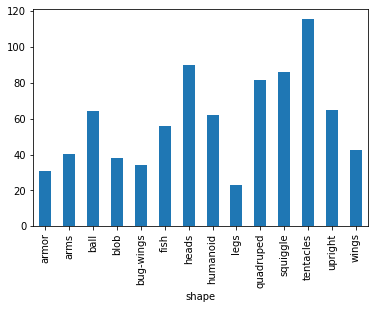

In [44]:
data.groupby("shape")["weight"].mean().plot.bar()

### Existují nějaké významně časté kombinace barev a tvarů?

In [51]:
data.groupby(["color", "shape"]).size().sort_values(ascending=False)

color  shape    
brown  quadruped    39
blue   upright      36
brown  upright      23
blue   quadruped    23
red    upright      22
                    ..
white  legs          1
       heads         1
brown  tentacles     1
pink   armor         1
black  armor         1
Length: 120, dtype: int64

## A co rozdělení sil mezi typy?

In [ ]:
data.boxplot(column='total', by='type 1', rot=90)

## Dětští pokémoni v jednotlivých generacích

In [ ]:
data.groupby(['generation', 'is baby']).size()

In [ ]:
data.groupby(['generation', 'is baby']).size().unstack().plot.bar(stacked=True)

## Dětští pokémoni a jejich skóre v jednotlivých generacích

In [ ]:
data['baby color'] = 'gray'
data.loc[data['is baby'] == 1, 'baby color'] = 'red'

In [ ]:
data.plot.scatter(x='generation', y='total', c=data['baby color'])